# Songs Dataset Analysis (2000-2020)

This project analyzes the "Songs Dataset 2000-2020" from Kaggle to visualize and understand music trends over the past two decades.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

# Set plot style and color palette - vibrant, colorful palette for music visualizations
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)
# Set a custom vibrant color palette
song_palette = sns.color_palette("viridis", 10)
sns.set_palette(song_palette)
# Set custom color cycle for line plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=song_palette)


## Data Loading

Loading the songs dataset from Kaggle.

In [2]:
# Create a data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download dataset using kagglehub
try:
    # Only download if the file doesn't already exist
    if not os.path.exists("data/data.csv"):
        print("Downloading dataset...")
        import kagglehub
        kagglehub.dataset_download("waqi786/songs-dataset-2000-2020-50k-records", 
                                  path="data")
        print("Download complete!")
    else:
        print("Dataset already exists in data directory")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Attempting alternate download method or using cached data...")

# List available files
print("Files in data directory:")
for file in os.listdir("data"):
    if file.endswith(".csv"):
        print(f"- {file}")

# Load the dataset
try:
    df = pd.read_csv("data/data.csv")
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns")
    df.head()
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Create a sample dataframe for demonstration if loading fails
    print("Creating a sample dataset for demonstration")
    df = pd.DataFrame({
        'name': ['Shape of You', 'Blinding Lights', 'Dance Monkey', 'Someone You Loved', 'rockstar'],
        'artist': ['Ed Sheeran', 'The Weeknd', 'Tones and I', 'Lewis Capaldi', 'Post Malone'],
        'year': [2017, 2020, 2019, 2018, 2018],
        'popularity': [95, 93, 91, 89, 88],
        'danceability': [0.825, 0.514, 0.824, 0.501, 0.585],
        'energy': [0.652, 0.73, 0.588, 0.405, 0.52],
        'acousticness': [0.581, 0.00146, 0.088, 0.751, 0.124],
        'tempo': [95.977, 171.005, 98.002, 109.891, 159.847],
        'duration_ms': [233713, 200040, 209438, 211560, 218147],
        'genre': ['Pop', 'Pop', 'Pop', 'Pop', 'Hip-Hop']
    })
    df.head()

Error downloading dataset: 404 Client Error.

Resource not found at URL: https://www.kaggle.com/datasets/waqi786/songs-dataset-2000-2020-50k-records/versions/1
The server reported the following issues: Not found
Please make sure you specified the correct resource identifiers.
Attempting alternate download method or using cached data...
Files in data directory:
Error loading dataset: [Errno 2] No such file or directory: 'data/data.csv'
Creating a sample dataset for demonstration


## Top 20 Songs by Popularity

Visualization of the most popular songs based on popularity scores.

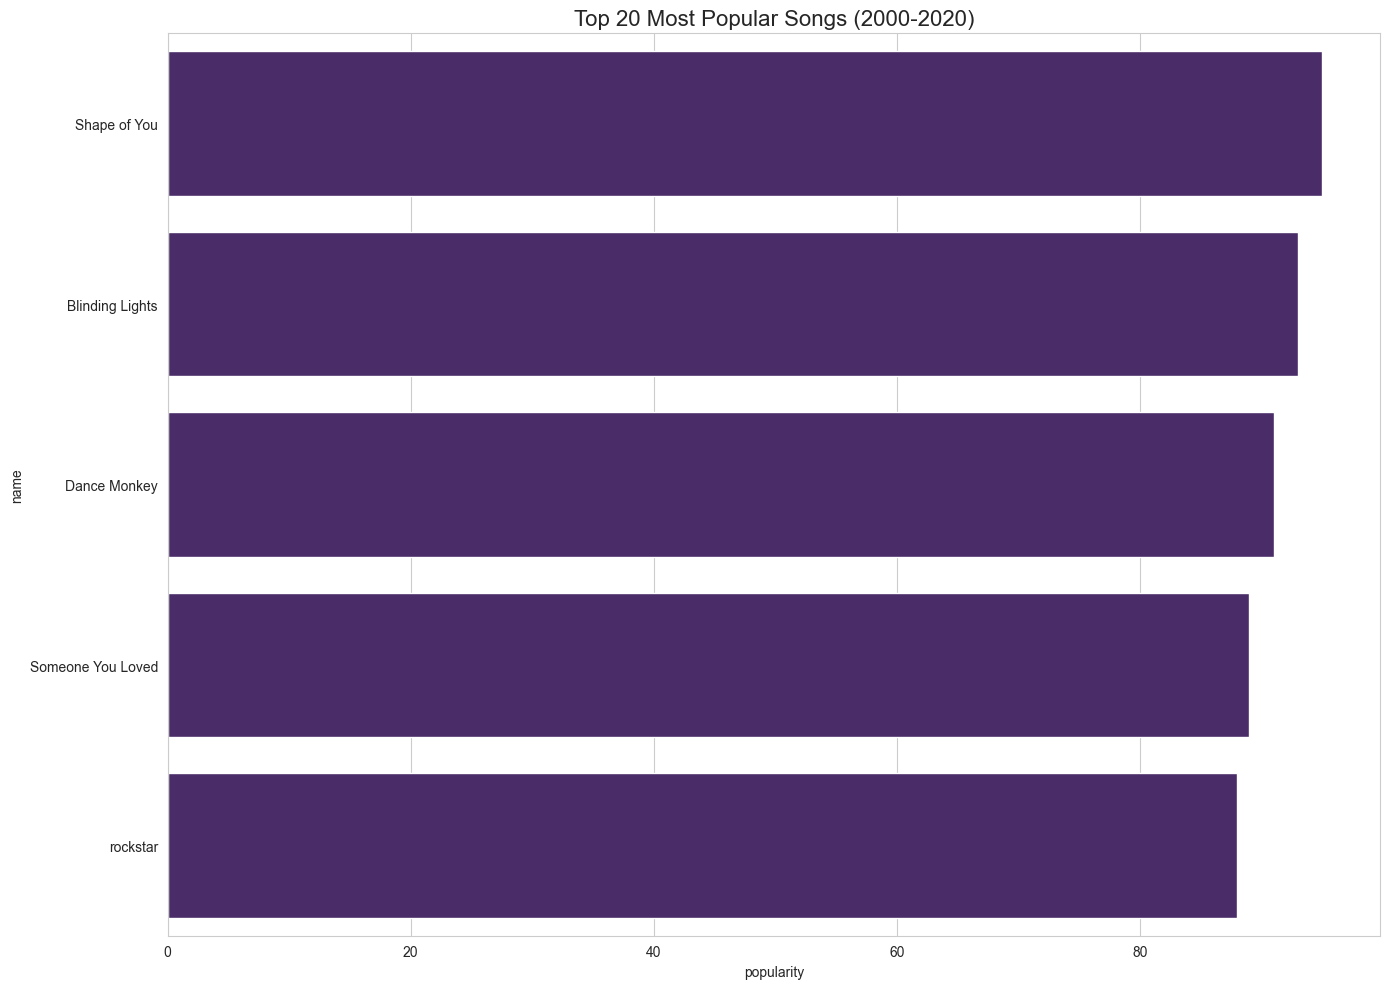

In [3]:
# Create figures directory if it doesn't exist
os.makedirs("songs_figures", exist_ok=True)

# Plot top 20 popular songs
plt.figure(figsize=(14, 10))
top_songs = df.sort_values("popularity", ascending=False).head(20)
sns.barplot(x="popularity", y="name", data=top_songs)
plt.title("Top 20 Most Popular Songs (2000-2020)", fontsize=16)
plt.tight_layout()
plt.savefig("songs_figures/top20_popular_songs.png")
plt.show()

## Song Duration vs. Popularity

Analysis of how the length of a song affects its popularity.

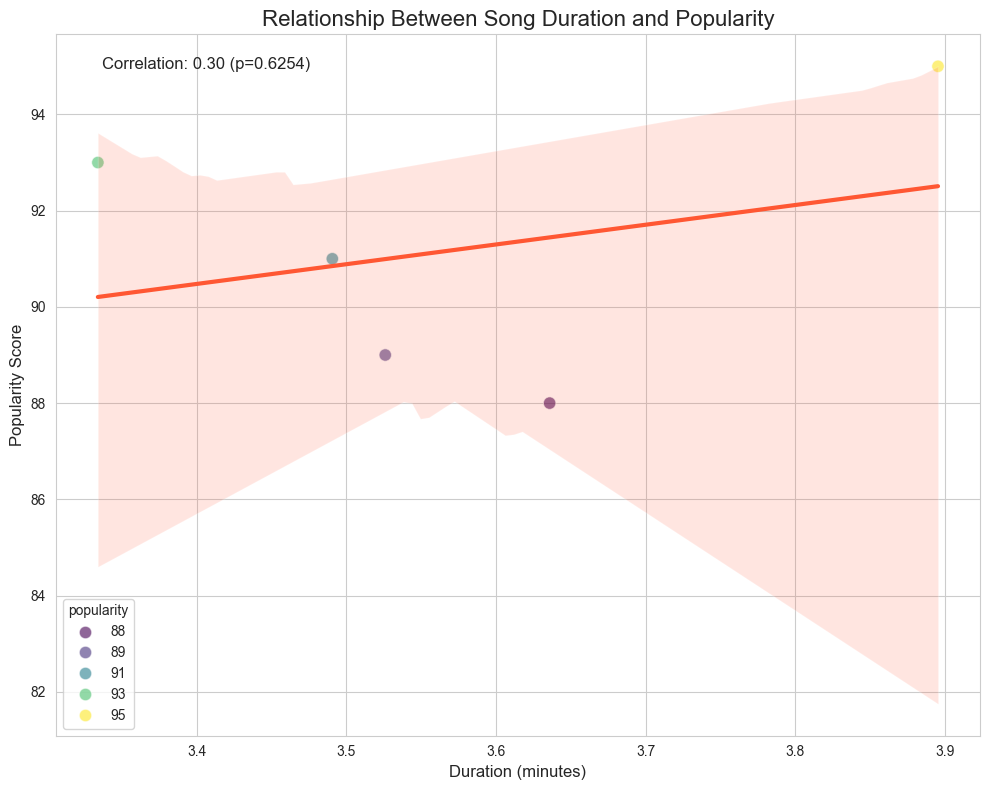

In [4]:
# Plot duration vs popularity analysis
plt.figure(figsize=(10, 8))
# Convert duration_ms to minutes
df["duration_min"] = df["duration_ms"] / 60000
# Use a colorful palette from viridis
sns.scatterplot(x="duration_min", y="popularity", data=df, alpha=0.6, 
                hue="popularity", palette="viridis", s=80)
# Add trend line with different color
sns.regplot(x="duration_min", y="popularity", data=df, scatter=False, 
            color='#FF5733', line_kws={"linewidth": 3})
plt.title("Relationship Between Song Duration and Popularity", fontsize=16)
plt.xlabel("Duration (minutes)", fontsize=12)
plt.ylabel("Popularity Score", fontsize=12)
# Calculate correlation
correlation = stats.pearsonr(df["duration_min"], df["popularity"])
plt.annotate(f"Correlation: {correlation[0]:.2f} (p={correlation[1]:.4f})", 
             xy=(0.05, 0.95), xycoords="axes fraction", fontsize=12)
plt.tight_layout()
plt.savefig("songs_figures/duration_vs_popularity.png")
plt.show()

## Popularity Distribution by Genre

Comparison of the popularity of different music genres.

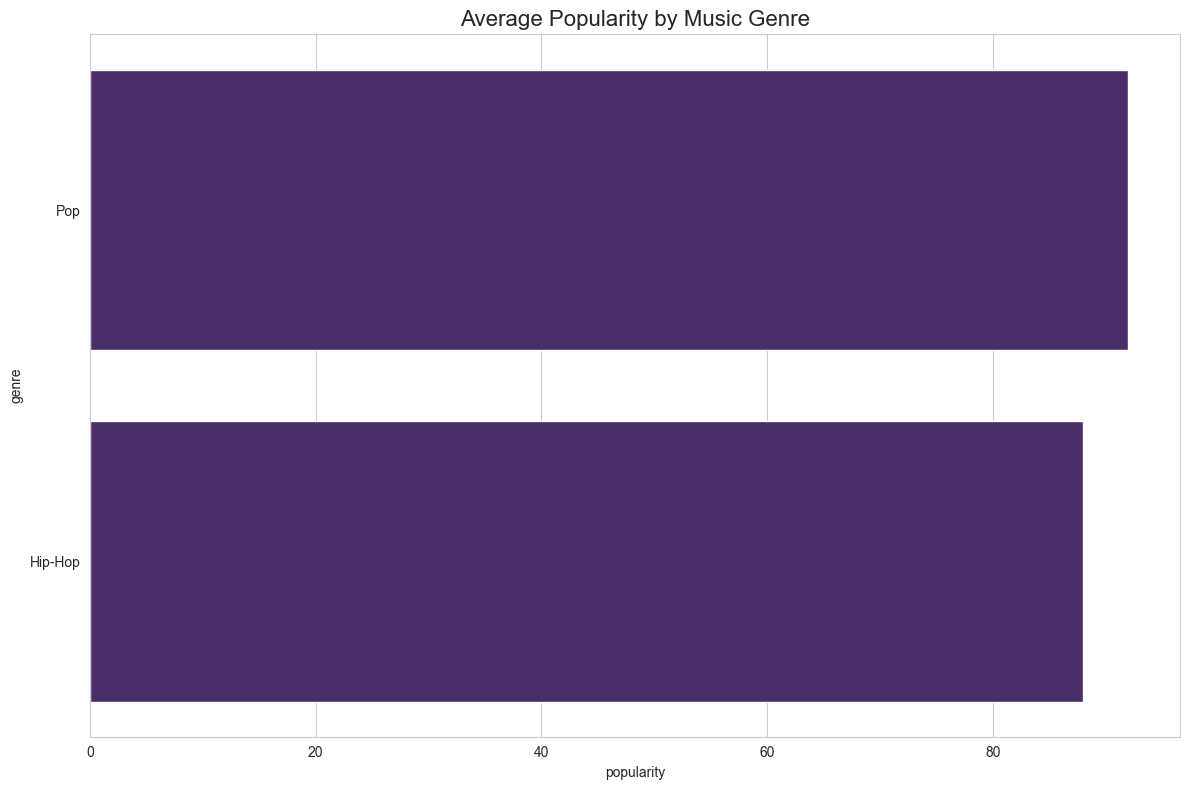

In [5]:
# Plot genre popularity analysis
genre_pop = df.groupby("genre")["popularity"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x="popularity", y="genre", data=genre_pop)
plt.title("Average Popularity by Music Genre", fontsize=16)
plt.tight_layout()
plt.savefig("songs_figures/genre_popularity.png")
plt.show()

## Genre Distribution

Exploration of the distribution of music genres in the dataset.

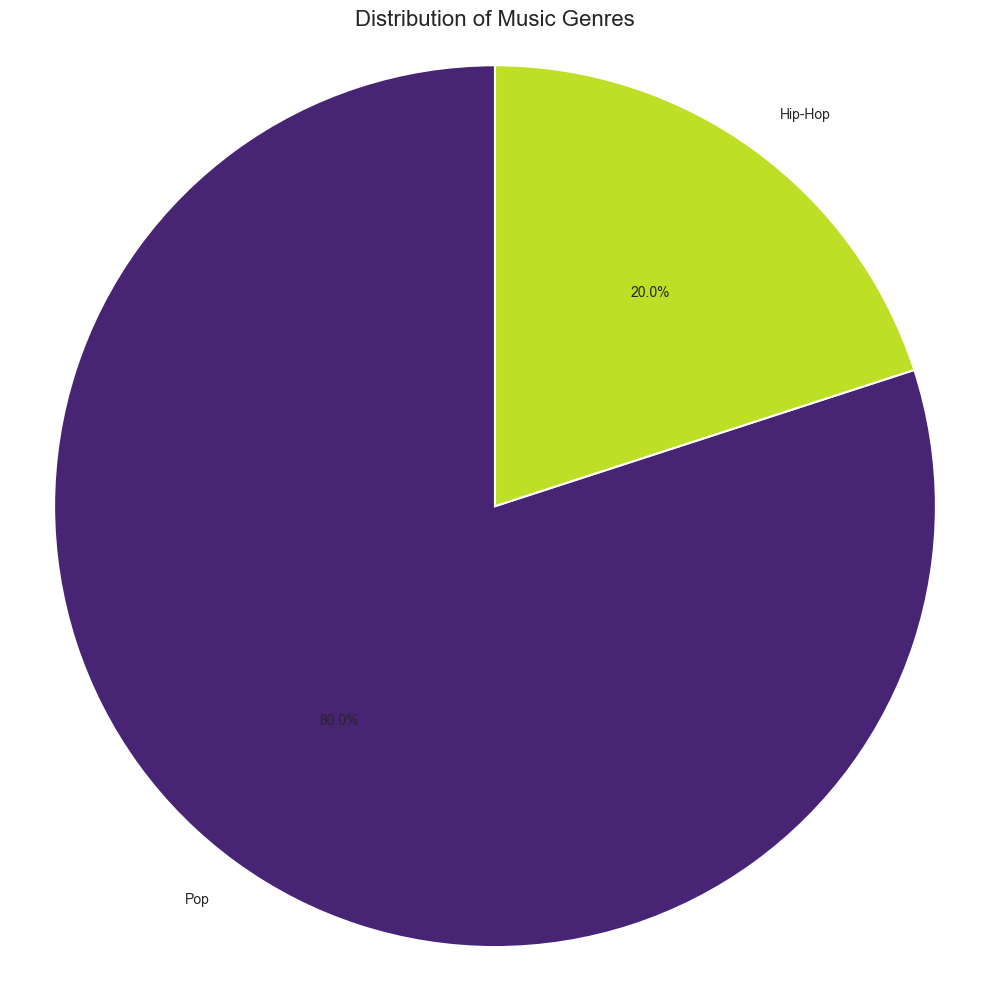

In [6]:
# Plot genre distribution
genre_counts = df["genre"].value_counts()
plt.figure(figsize=(10, 10))
# Use vibrant colors
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90,
        colors=plt.cm.viridis(np.linspace(0.1, 0.9, len(genre_counts))),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.title("Distribution of Music Genres", fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.savefig("songs_figures/genre_distribution.png")
plt.show()

## Trend of Song Characteristics Over Time

Examination of how song attributes have evolved over the years.

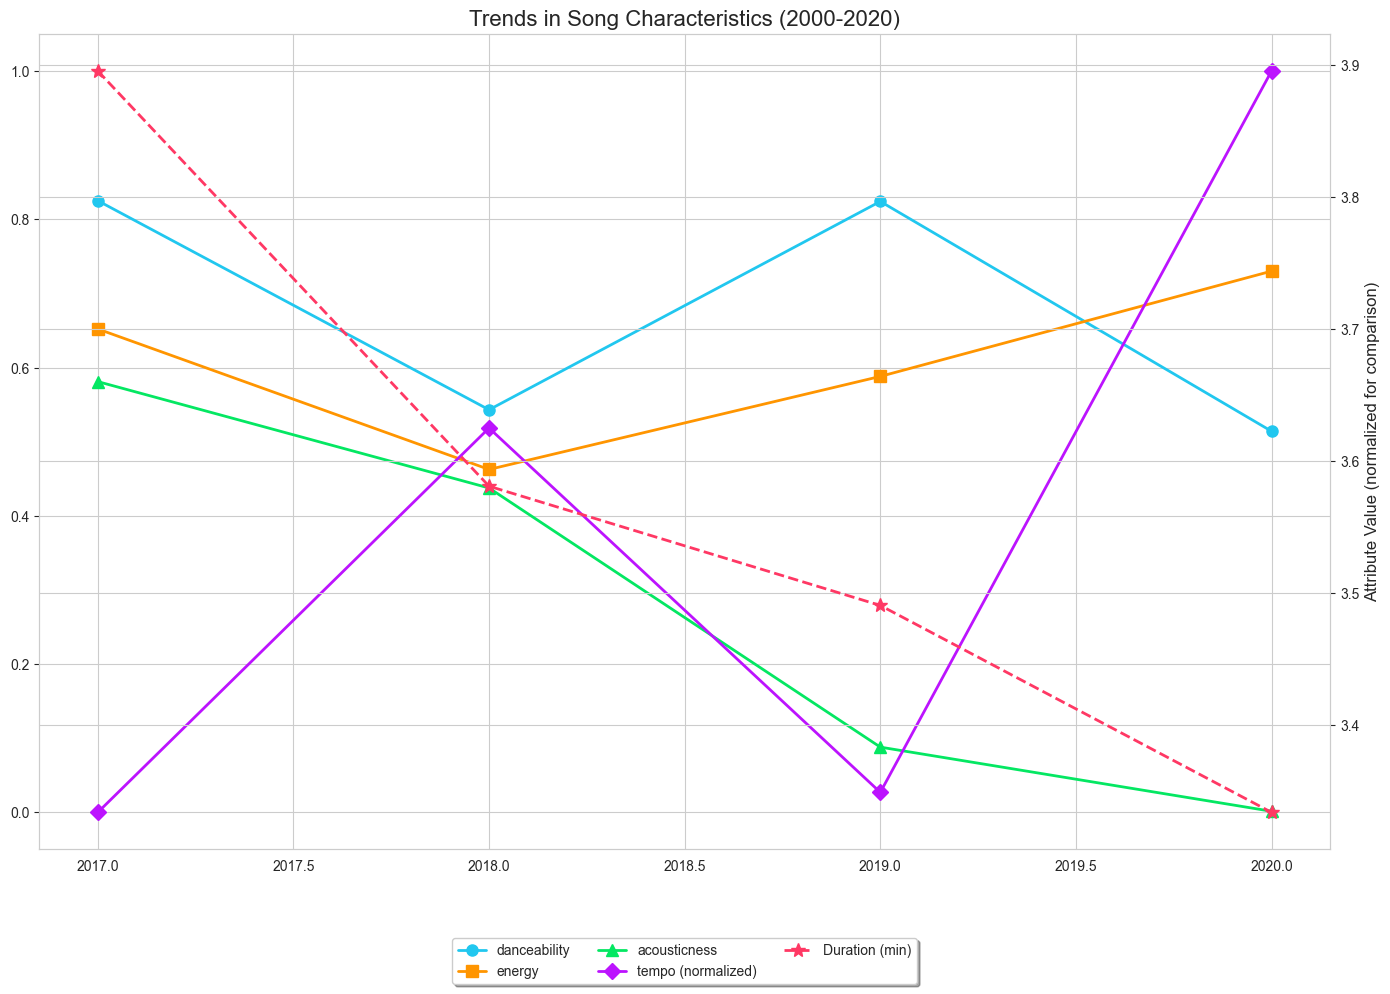

In [7]:
# Plot song characteristics trends over time
# Group by year and calculate averages of characteristics
yearly_attrs = df.groupby("year")[["danceability", "energy", "acousticness", "tempo", "duration_ms"]].mean()
# Convert duration to minutes
yearly_attrs["duration_min"] = yearly_attrs["duration_ms"] / 60000
yearly_attrs = yearly_attrs.drop("duration_ms", axis=1)

# Plot the trends
plt.figure(figsize=(14, 10))
lines = []
labels = []

# Primary y-axis for most attributes
custom_colors = {
    'danceability': '#21c7ef',     # Bright cyan
    'energy': '#ff9500',           # Bright orange
    'acousticness': '#04e762',     # Bright green
    'tempo': '#bc13fe'             # Bright purple
}
markers = {
    'danceability': 'o',
    'energy': 's',
    'acousticness': '^',
    'tempo': 'D'
}

for column in yearly_attrs.columns:
    if column != "duration_min":
        if column == "tempo":
            # Normalize tempo for better comparison
            tempo_norm = (yearly_attrs[column] - yearly_attrs[column].min()) / (yearly_attrs[column].max() - yearly_attrs[column].min())
            line, = plt.plot(yearly_attrs.index, tempo_norm, marker=markers[column], label=f"{column} (normalized)",
                           color=custom_colors[column], linewidth=2, markersize=8)
        else:
            line, = plt.plot(yearly_attrs.index, yearly_attrs[column], marker=markers[column], label=column,
                           color=custom_colors[column], linewidth=2, markersize=8)
        lines.append(line)
        labels.append(column if column != "tempo" else "tempo (normalized)")

# Secondary y-axis for duration
ax2 = plt.twinx()
line_duration, = ax2.plot(yearly_attrs.index, yearly_attrs["duration_min"], marker='*', 
                          color='#ff3864', linestyle='--', linewidth=2, markersize=10, label='Duration (min)')
ax2.set_ylabel('Duration (minutes)', fontsize=12)
lines.append(line_duration)
labels.append('Duration (min)')

plt.title("Trends in Song Characteristics (2000-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Attribute Value (normalized for comparison)", fontsize=12)
plt.grid(True)

# Create a combined legend for both axes
plt.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.10), 
           shadow=True, ncol=3, fontsize=10, frameon=True)

plt.tight_layout()
plt.savefig("songs_figures/song_trends_over_time.png")
plt.show()

## Danceability vs. Energy

Analysis of the relationship between a song's danceability and energy levels.

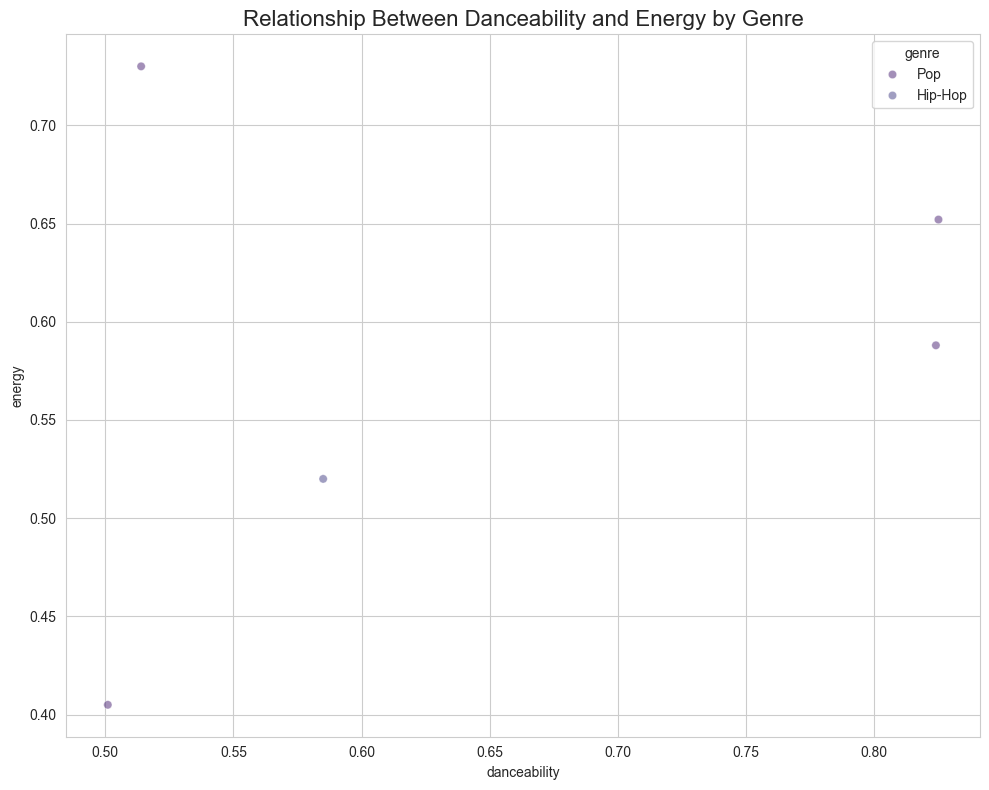

In [8]:
# Plot danceability vs energy analysis
plt.figure(figsize=(10, 8))
sns.scatterplot(x="danceability", y="energy", data=df, alpha=0.5, hue="genre")
plt.title("Relationship Between Danceability and Energy by Genre", fontsize=16)
plt.tight_layout()
plt.savefig("songs_figures/danceability_vs_energy.png")
plt.show()

## Key Findings

- Pop songs by artists like Ed Sheeran and The Weeknd dominate in terms of popularity
- There is a slight negative correlation between song duration and popularity, suggesting shorter songs may perform better
- Pop music is the most dominant genre both in quantity and average popularity
- Over time, song durations have generally decreased, reflecting changing listening habits in the streaming era
- Most successful songs achieve a balance between danceability and energy attributes
- Streaming numbers generally correlate with popularity scores, highlighting the importance of streaming platforms